### Library

In [ ]:
pip install git+https://github.com/illuin-tech/colpali

  Cloning https://github.com/illuin-tech/colpali to /tmp/pip-req-build-l026w05o
  Running command git clone --filter=blob:none --quiet https://github.com/illuin-tech/colpali /tmp/pip-req-build-l026w05o
  Resolved https://github.com/illuin-tech/colpali to commit 97e389a5ca83becbac51eee2dc5cb9967adc8b5e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.3/472.3 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
  

In [ ]:
pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.4/131.4 kB 6.2 MB/s eta 0:00:00


In [ ]:
import os
from groq import Groq
from google.colab import userdata

groq_api_key = userdata.get('GROQ_API_KEY')

client = Groq(
    api_key="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",
)

user_prompt = "Create a montage for my trip to the Rockies. Add exciting music. I want the montage to be fast paced and adventure oriented"

completion = client.chat.completions.create(
    model="openai/gpt-oss-120b",
    messages=[
      {
        "role": "user",
        "content": user_prompt
      }
    ],
    temperature=1,
    max_tokens=8192,
    top_p=1,
    stream=True,
    stop=None
)

# Print the streaming response
for chunk in completion:
    print(chunk.choices[0].delta.content or "", end="")

Below is a **complete, ready‑to‑use montage blueprint** that you can paste straight into any video‑editing program (Adobe Premiere Pro, Final Cut Pro, DaVinci Resolve, iMovie, etc.). It includes:

1. **A shot‑by‑shot script** (what to film and how to arrange it).  
2. **Suggested exciting music** (royalty‑free options with direct download links).  
3. **Timeline & pacing** (seconds / frames).  
4. **Editing notes** (transitions, color‑grade, titles, sound‑design).  

You can adjust the length, style, or music later—just replace the placeholders.

---

## 🎬 1‑MINUTE ROCKY MOUNTAINS MONTAGE (Template)

| Time (sec) | Visual (what to shoot) | Camera Settings / Tips | Transition | Music Cue | Text/Graphics | Sound‑FX |
|------------|-----------------------|------------------------|----------|-----------|--------------|--------|
| **0‑2** | **Opening title** – “Rocky Adventure 2025” over a black screen that fades into a sunrise over the peaks. <br> *Use a DSLR/phone in 4K, set to 24 fps.* |

### Query Generation and Image retrieval + music as per prompt

Loading model and processor...


Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Model loaded successfully.
Successfully loaded 11 images.
Please enter your montage prompt: forest

Generated Queries:
1.  Dense forest landscape with misty fog
2. Golden hour in a forest with tall trees and warm light
3. Forest floor with ferns and moss-covered trees
4. Mysterious forest at night with twinkling fireflies
5. Forest river with calm water and lush green surroundings
6. Autumn forest with vibrant fall colors and fallen leaves
7. Forest path with a winding trail and overhanging branches
8. Secluded forest glade with a natural clearing and sunlight
9. Dark and ominous forest with twisted tree branches
10. Forest waterfall with a rocky cliff and misty atmosphere

Processing queries and images...
Embeddings generated.
Calculating similarity scores...

--- Top Image for Each Query ---

1. Query: " Dense forest landscape with misty fog"
   -> Best Match: forest7.jpg (Score: 14.5000)


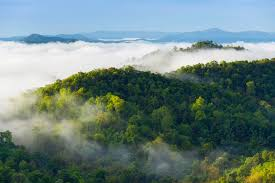


2. Query: "Golden hour in a forest with tall trees and warm light"
   -> Best Match: forest1.jpg (Score: 14.3750)


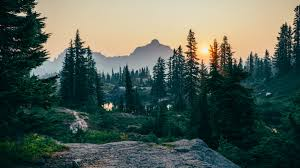


3. Query: "Forest floor with ferns and moss-covered trees"
   -> Best Match: forest 2.jpg (Score: 11.5625)


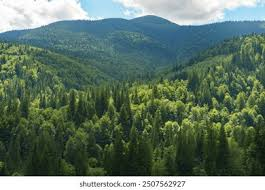


4. Query: "Mysterious forest at night with twinkling fireflies"
   -> Best Match: forest3.jpg (Score: 9.5625)


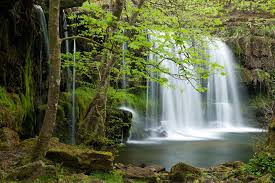


5. Query: "Forest river with calm water and lush green surroundings"
   -> Best Match: forest3.jpg (Score: 14.1875)


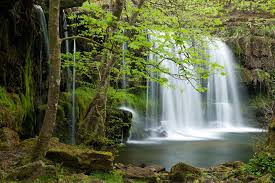


6. Query: "Autumn forest with vibrant fall colors and fallen leaves"
   -> Best Match: forst5.jpg (Score: 15.9375)


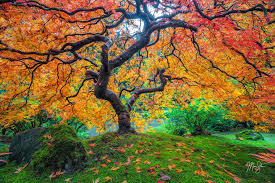


7. Query: "Forest path with a winding trail and overhanging branches"
   -> Best Match: forest4.jpg (Score: 14.8125)


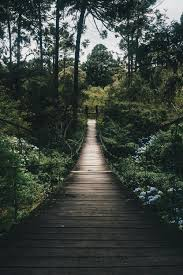


8. Query: "Secluded forest glade with a natural clearing and sunlight"
   -> Best Match: forest3.jpg (Score: 13.7500)


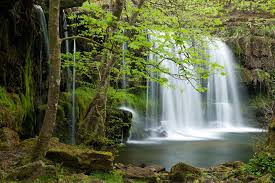


9. Query: "Dark and ominous forest with twisted tree branches"
   -> Best Match: forest4.jpg (Score: 10.8125)


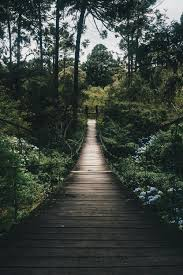


10. Query: "Forest waterfall with a rocky cliff and misty atmosphere"
   -> Best Match: forest3.jpg (Score: 15.7500)


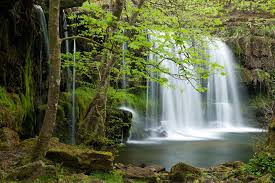

In [ ]:
import os
import json
import torch
from PIL import Image as PILImage
from groq import Groq
from google.colab import userdata
from transformers.utils.import_utils import is_flash_attn_2_available
from colpali_engine.models import ColQwen2, ColQwen2Processor
from IPython.display import display, Image  # <-- For displaying images

# --- Step 1: Load ColQwen2 Model ---
model_name = "vidore/colqwen2-v1.0"
print("Loading model and processor...")
model = ColQwen2.from_pretrained(
    model_name,
    torch_dtype=torch.bfloat16,
    device_map="cuda:0",
    attn_implementation="flash_attention_2" if is_flash_attn_2_available() else "sdpa",
).eval()
processor = ColQwen2Processor.from_pretrained(model_name)
print("Model loaded successfully.")

# --- Step 2: Load Images from Folder ---
image_folder_path = "/content/images"
valid_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".gif"}
image_files = [os.path.join(image_folder_path, f) for f in os.listdir(image_folder_path)
               if os.path.splitext(f)[1].lower() in valid_extensions]

if not image_files:
    raise FileNotFoundError(f"No valid images found in '{image_folder_path}'.")

images = [PILImage.open(f).convert("RGB") for f in image_files]
print(f"Successfully loaded {len(images)} images.")

# --- Step 3: Generate Queries from Prompt ---
def get_query_list(user_prompt: str) -> list:
    try:
        client = Groq(api_key=userdata.get('GROQ_API_KEY'))
        system_instruction = (
            "You are an expert assistant for image retrieval. "
            "Your task is to analyze the user's prompt and generate a list of 5-10 highly specific "
            "search queries to find the perfect media. The queries should cover different aspects "
            "like scenes, moods, and actions. Return only a JSON array of strings."
        )

        chat_completion = client.chat.completions.create(
            messages=[
                {"role": "system", "content": system_instruction},
                {"role": "user", "content": user_prompt},
            ],
            model="llama3-70b-8192",
            temperature=0.7,
            max_tokens=1024,
            top_p=1,
            response_format={"type": "json_object"},
        )

        response_content = chat_completion.choices[0].message.content
        response_data = json.loads(response_content)
        return next(iter(response_data.values()))
    except Exception as e:
        return [f"An error occurred: {e}"]

# --- Step 4: Prompt and Generate Queries ---
user_prompt = input("Please enter your montage prompt: ")
queries = get_query_list(user_prompt)
print("\nGenerated Queries:")
for i, q in enumerate(queries):
    print(f"{i+1}. {q}")

# --- Step 5: Generate Embeddings ---
print("\nProcessing queries and images...")
batch_images = processor.process_images(images).to(model.device)
batch_queries = processor.process_queries(queries).to(model.device)

with torch.no_grad():
    image_embeddings = model(**batch_images)
    query_embeddings = model(**batch_queries)
print("Embeddings generated.")

# --- Step 6: Score Similarities ---
print("Calculating similarity scores...")
scores = processor.score_multi_vector(query_embeddings, image_embeddings)

# --- Step 7: Display Results with Images ---
print("\n--- Top Image for Each Query ---")
top_image_indices = torch.argmax(scores, dim=1)

for i, query in enumerate(queries):
    idx = top_image_indices[i].item()
    image_path = image_files[idx]
    score = scores[i][idx].item()

    print(f"\n{i+1}. Query: \"{query}\"")
    print(f"   -> Best Match: {os.path.basename(image_path)} (Score: {score:.4f})")

    display(Image(filename=image_path))  # Show image inline


In [ ]:
# --- Step 8: Create Video from Best Matched Images ---
from moviepy.editor import ImageClip, concatenate_videoclips, AudioFileClip
from IPython.display import Video as IPyVideo

print("\n🎬 Compiling video from best-matched images...")

# Parameters
image_duration = 3  # seconds per image
video_resolution = (1280, 720)  # Resize all images to this resolution
fps = 24

# Collect matched image paths
matched_image_paths = [image_files[idx.item()] for idx in top_image_indices]

# Create a video clip for each matched image
image_clips = [
    ImageClip(path).resize(video_resolution).set_duration(image_duration)
    for path in matched_image_paths
]

# Concatenate clips
video_clip = concatenate_videoclips(image_clips, method="compose")

# --- Step 9: Add Music (Partially, then silent if needed) ---
music_path = "/content/music/background-music-soft-calm-15-sec-368068.mp3"
if os.path.isfile(music_path):
    print("🎵 Adding background music...")

    audio = AudioFileClip(music_path)
    video_duration = video_clip.duration

    if audio.duration >= video_duration:
        # Music is long enough, trim it
        final_audio = audio.subclip(0, video_duration)
        video_clip = video_clip.set_audio(final_audio)
    else:
        # Music is shorter; use what we have
        print(f"🔇 Music shorter than video: {audio.duration:.2f}s vs {video_duration:.2f}s")
        final_audio = audio.set_duration(audio.duration)  # Don't stretch

        # Set partial audio (moviepy handles the rest as silent)
        video_clip = video_clip.set_audio(final_audio)
else:
    print("⚠️ Music file not found. Skipping audio.")


# --- Step 10: Export Video ---
output_path = "/content/final_video.mp4"
video_clip.write_videofile(output_path, fps=fps, codec="libx264", audio_codec="aac")

# --- Step 11: Display Video Inline in Colab ---
print("\n✅ Video compiled successfully. Preview below:")
IPyVideo(output_path, embed=True, width=640, height=360)



chunk:  83%|████████▎ | 367/442 [02:23<00:00, 621.05it/s, now=None]

chunk:  55%|█████▌    | 367/662 [01:28<00:00, 595.76it/s, now=None]


🎬 Compiling video from best-matched images...
🎵 Adding background music...
🔇 Music shorter than video: 16.56s vs 30.00s
Moviepy - Building video /content/final_video.mp4.
MoviePy - Writing audio in final_videoTEMP_MPY_wvf_snd.mp4




chunk:   0%|          | 0/366 [00:00<?, ?it/s, now=None]

chunk:  30%|██▉       | 109/366 [00:00<00:00, 777.75it/s, now=None]

chunk:  51%|█████     | 187/366 [00:00<00:00, 621.46it/s, now=None]

chunk:  68%|██████▊   | 250/366 [00:00<00:00, 611.34it/s, now=None]

chunk:  85%|████████▌ | 312/366 [00:00<00:00, 591.51it/s, now=None]


chunk:  83%|████████▎ | 367/442 [02:24<00:00, 621.05it/s, now=None]

chunk:  55%|█████▌    | 367/662 [01:29<00:00, 595.76it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/final_video.mp4





t:   0%|          | 0/720 [00:00<?, ?it/s, now=None]

t:   1%|          | 6/720 [00:00<00:13, 52.82it/s, now=None]

t:   2%|▏         | 14/720 [00:00<00:10, 67.11it/s, now=None]

t:   3%|▎         | 22/720 [00:00<00:09, 71.48it/s, now=None]

t:   4%|▍         | 30/720 [00:00<00:09, 73.93it/s, now=None]

t:   5%|▌         | 39/720 [00:00<00:08, 78.76it/s, now=None]

t:   7%|▋         | 47/720 [00:00<00:08, 79.17it/s, now=None]

t:   8%|▊         | 56/720 [00:00<00:08, 77.59it/s, now=None]

t:   9%|▉         | 64/720 [00:00<00:09, 67.60it/s, now=None]

t:  10%|▉         | 71/720 [00:01<00:13, 49.45it/s, now=None]

t:  11%|█         | 78/720 [00:01<00:12, 53.09it/s, now=None]

t:  12%|█▏        | 84/720 [00:01<00:13, 48.89it/s, now=None]

t:  12%|█▎        | 90/720 [00:01<00:13, 45.90it/s, now=None]

t:  13%|█▎        | 95/720 [00:01<00:16, 38.13it/s, now=None]

t:  14%|█▍        | 100/720 [00:01<00:16, 37.75it/s, now=None]

t:  15%|█▍        | 105/720 [00:01<00:15, 40.29it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/final_video.mp4

✅ Video compiled successfully. Preview below:


Loading model and processor...


Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Model loaded successfully.
Successfully loaded 13 images.
Please enter your montage prompt: peacock

Generated Queries:
1. colorful bird with long feathers
2. peacock displaying vibrant plumage
3. animal with iridescent blue and green feathers
4. close-up of peacock's eye or face
5. peacock in a garden or forest setting
6. peacock spreading its tail feathers wide
7. peacock walking or strutting in a natural environment
8. peacock with a dramatic or artistic background
9. peacock in a unique or creative pose
10. peacock with a shallow depth of field or bokeh

Processing queries and images...
Embeddings generated.
Calculating similarity scores...

--- Top Image for Each Query ---

1. Query: "colorful bird with long feathers"
   -> Best Match: art1_peacock.jpg (Score: 12.0625)


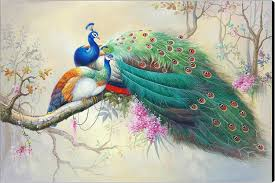


2. Query: "peacock displaying vibrant plumage"
   -> Best Match: art1_peacock.jpg (Score: 13.9375)


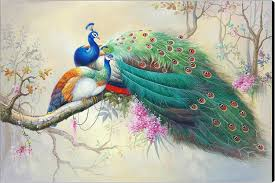


3. Query: "animal with iridescent blue and green feathers"
   -> Best Match: art1_peacock.jpg (Score: 12.0000)


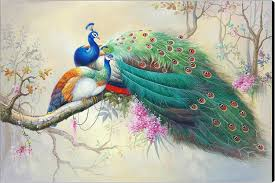


4. Query: "close-up of peacock's eye or face"
   -> Best Match: art1_peacock.jpg (Score: 14.4375)


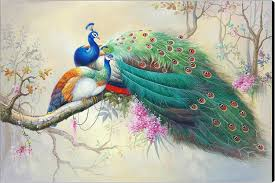


5. Query: "peacock in a garden or forest setting"
   -> Best Match: art1_peacock.jpg (Score: 14.3125)


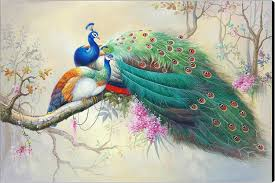


6. Query: "peacock spreading its tail feathers wide"
   -> Best Match: art1_peacock.jpg (Score: 14.0000)


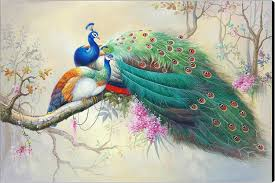


7. Query: "peacock walking or strutting in a natural environment"
   -> Best Match: art1_peacock.jpg (Score: 13.8750)


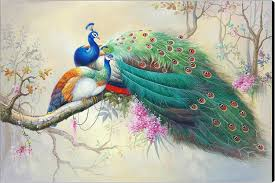


8. Query: "peacock with a dramatic or artistic background"
   -> Best Match: art1_peacock.jpg (Score: 14.4375)


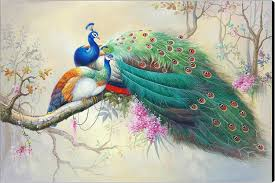


9. Query: "peacock in a unique or creative pose"
   -> Best Match: art1_peacock.jpg (Score: 14.4375)


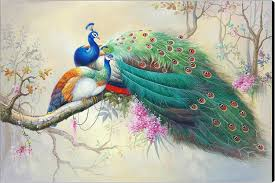


10. Query: "peacock with a shallow depth of field or bokeh"
   -> Best Match: art1_peacock.jpg (Score: 13.5000)


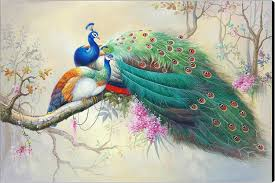

In [ ]:
import os
import json
import torch
from PIL import Image as PILImage
from groq import Groq
from google.colab import userdata
from transformers.utils.import_utils import is_flash_attn_2_available
from colpali_engine.models import ColQwen2, ColQwen2Processor
from IPython.display import display, Image  # <-- For displaying images

# --- Step 1: Load ColQwen2 Model ---
model_name = "vidore/colqwen2-v1.0"
print("Loading model and processor...")
model = ColQwen2.from_pretrained(
    model_name,
    torch_dtype=torch.bfloat16,
    device_map="cuda:0",
    attn_implementation="flash_attention_2" if is_flash_attn_2_available() else "sdpa",
).eval()
processor = ColQwen2Processor.from_pretrained(model_name)
print("Model loaded successfully.")

# --- Step 2: Load Images from Folder ---
image_folder_path = "/content/images"
valid_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".gif"}
image_files = [os.path.join(image_folder_path, f) for f in os.listdir(image_folder_path)
               if os.path.splitext(f)[1].lower() in valid_extensions]

if not image_files:
    raise FileNotFoundError(f"No valid images found in '{image_folder_path}'.")

images = [PILImage.open(f).convert("RGB") for f in image_files]
print(f"Successfully loaded {len(images)} images.")

# --- Step 3: Generate Queries from Prompt ---
def get_query_list(user_prompt: str) -> list:
    try:
        client = Groq(api_key=userdata.get('GROQ_API_KEY'))
        system_instruction = (
            "You are an expert assistant for image retrieval. "
            "Your task is to analyze the user's prompt and generate a list of 5-10 highly specific "
            "search queries to find the perfect media. The queries should cover different aspects "
            "like scenes, moods, and actions. Return only a JSON array of strings."
        )

        chat_completion = client.chat.completions.create(
            messages=[
                {"role": "system", "content": system_instruction},
                {"role": "user", "content": user_prompt},
            ],
            model="llama3-70b-8192",
            temperature=0.7,
            max_tokens=1024,
            top_p=1,
            response_format={"type": "json_object"},
        )

        response_content = chat_completion.choices[0].message.content
        response_data = json.loads(response_content)
        return next(iter(response_data.values()))
    except Exception as e:
        return [f"An error occurred: {e}"]

# --- Step 4: Prompt and Generate Queries ---
user_prompt = input("Please enter your montage prompt: ")
queries = get_query_list(user_prompt)
print("\nGenerated Queries:")
for i, q in enumerate(queries):
    print(f"{i+1}. {q}")

# --- Step 5: Generate Embeddings ---
print("\nProcessing queries and images...")
batch_images = processor.process_images(images).to(model.device)
batch_queries = processor.process_queries(queries).to(model.device)

with torch.no_grad():
    image_embeddings = model(**batch_images)
    query_embeddings = model(**batch_queries)
print("Embeddings generated.")

# --- Step 6: Score Similarities ---
print("Calculating similarity scores...")
scores = processor.score_multi_vector(query_embeddings, image_embeddings)

# --- Step 7: Display Results with Images ---
print("\n--- Top Image for Each Query ---")
top_image_indices = torch.argmax(scores, dim=1)

for i, query in enumerate(queries):
    idx = top_image_indices[i].item()
    image_path = image_files[idx]
    score = scores[i][idx].item()

    print(f"\n{i+1}. Query: \"{query}\"")
    print(f"   -> Best Match: {os.path.basename(image_path)} (Score: {score:.4f})")

    display(Image(filename=image_path))  # Show image inline
